In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("cartaocred.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
df.shape

(10127, 23)

In [4]:
df=df.drop(df.columns[[0,21,22]], axis=1)
#dropando a coluna com o número do cliente por ser inútil para a análise e as duas últimas pois são tabelas de análise que não são úteis também.

In [5]:
df.columns=df.columns.str.lower()
#passando o nome de todas as colunas para letras minusculas, facilitando o trabalho

In [6]:
df.isna().sum()
#vejo se existe valor nulo e, com sorte, não há.

attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

In [7]:
df.attrition_flag.value_counts()
#existem apenas dois tipos de flag.

Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

In [8]:
df.loc[df['gender'] == "M", 'gender'] = 1
df.loc[df['gender'] == "F", 'gender'] = 0
#troco M por 1 e F por 0 na tabela de genero, facilitando a análise

In [9]:
df.loc[df['attrition_flag'] == "Existing Customer", 'attrition_flag'] = 1
df.loc[df['attrition_flag'] == "Attrited Customer", 'attrition_flag'] = 0

In [13]:
df.info()
#coluna genero ainda é object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  int32  
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  int32  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

In [11]:
df['gender']=df['gender'].astype(str).astype(int)
#transformo a coluna genero em int


In [12]:
df['attrition_flag']=df['attrition_flag'].astype(str).astype(int)

In [14]:
df.info()
#confirmando o que disse anteriormente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attrition_flag            10127 non-null  int32  
 1   customer_age              10127 non-null  int64  
 2   gender                    10127 non-null  int32  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   income_category           10127 non-null  object 
 7   card_category             10127 non-null  object 
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  
 14  avg_op

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
attrition_flag,10127.0,0.839340,0.367235,0.0,1.000,1.000,1.000,1.000
customer_age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
gender,10127.0,0.470919,0.499178,0.0,0.000,0.000,1.000,1.000
dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
total_relationship_count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
months_inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
contacts_count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
credit_limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
total_revolving_bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000


Vemos que 47% dos clientes são do sexo masculino e 53% são do sexo feminino.
Tanto a mediana quanto a média da idade dos clientes fica na faixa dos 46 anos e idade.
Cerca de 84% dos dados pertence a clientes ativos e 16% a clientes que desativaram o cartão.


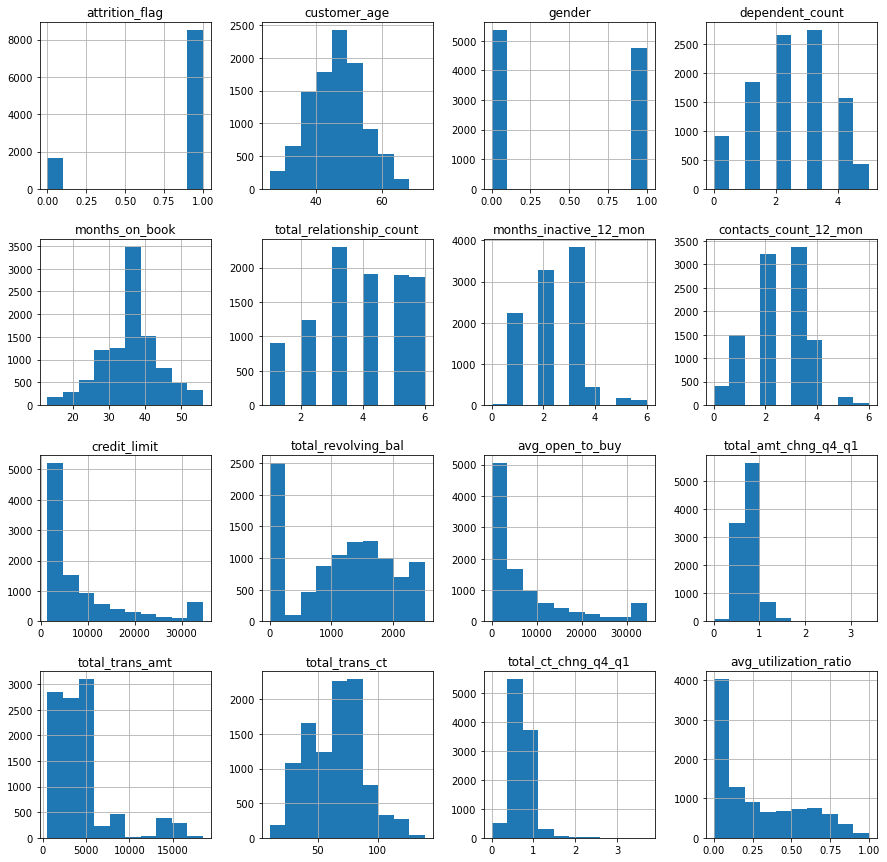

In [18]:
df.hist(figsize=(15,15))
plt.show()

C:\Users\adm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


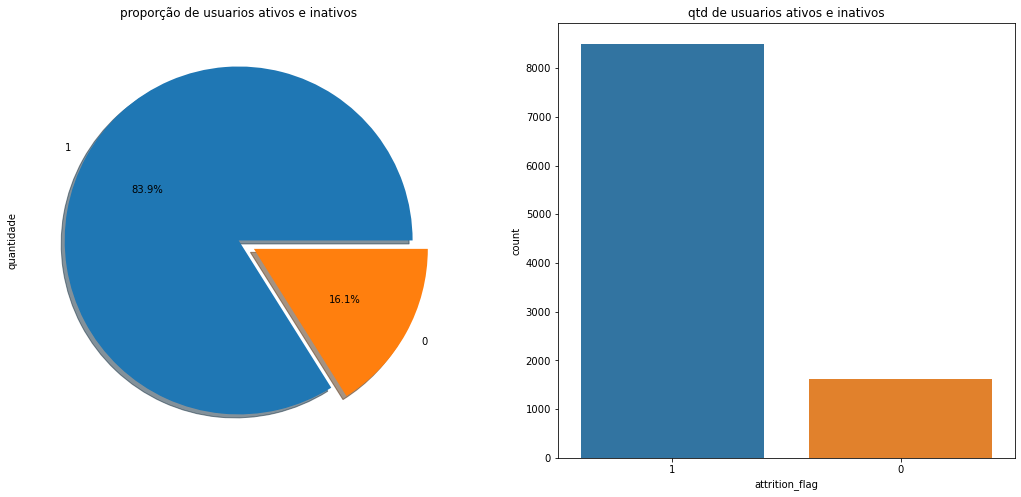

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['attrition_flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('proporção de usuarios ativos e inativos')
ax[0].set_ylabel('quantidade')
sns.countplot('attrition_flag',data=df,ax=ax[1],order=df['attrition_flag'].value_counts().index)
ax[1].set_title('qtd de usuarios ativos e inativos')
plt.show()

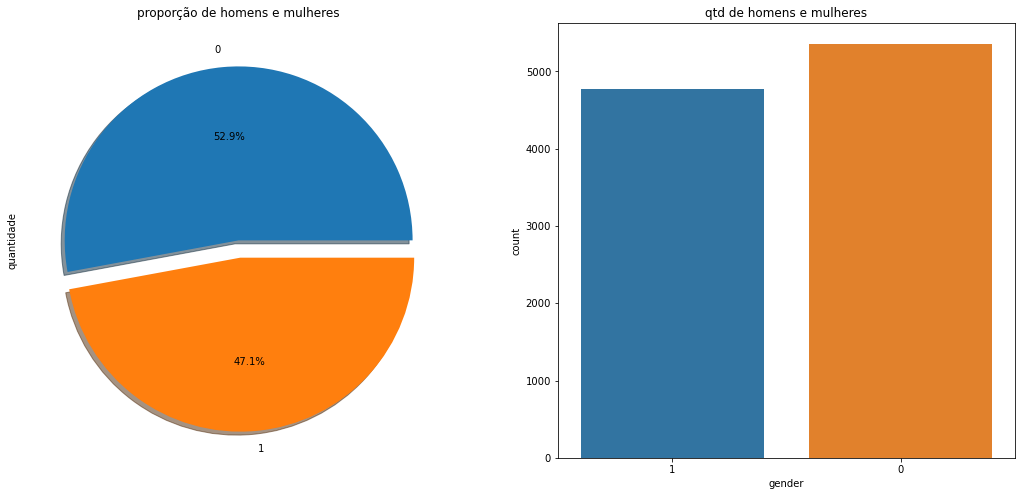

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('proporção de homens e mulheres')
ax[0].set_ylabel('quantidade')
sns.countplot(x='gender',data=df,ax=ax[1],order=df['attrition_flag'].value_counts().index)
ax[1].set_title('qtd de homens e mulheres')
plt.show()

C:\Users\adm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


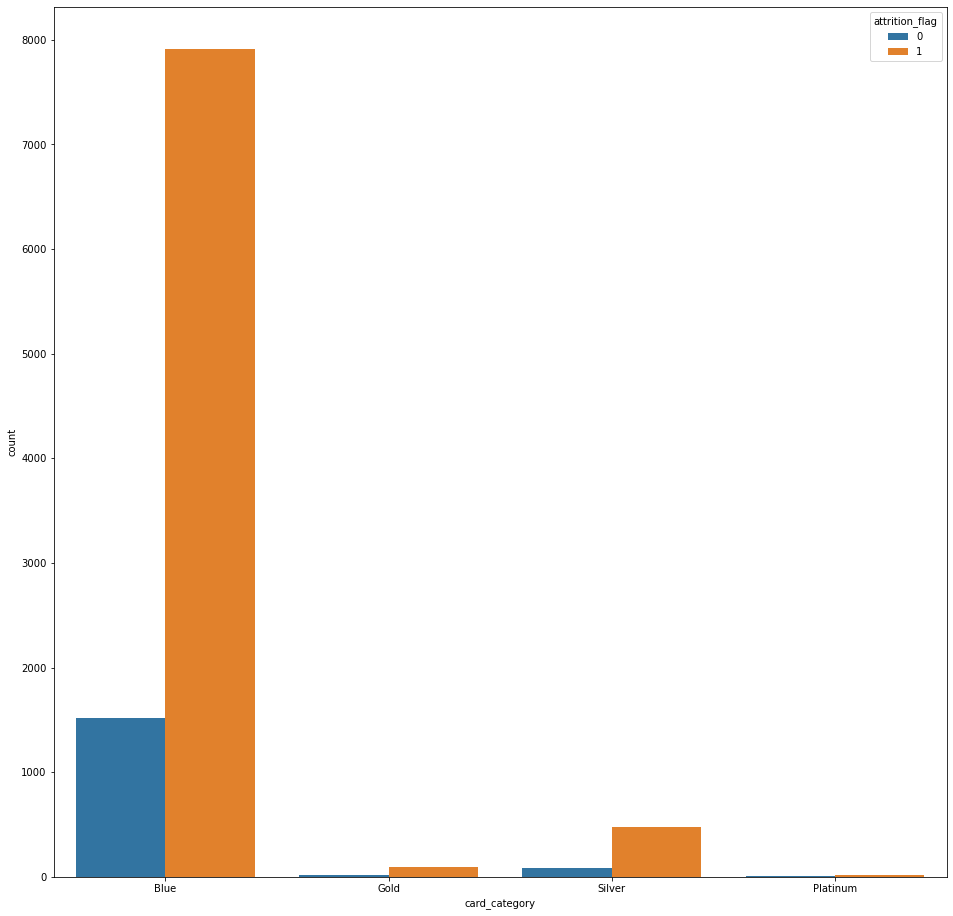

In [21]:
plt.figure(figsize = (16,16))
sns.countplot(df.card_category,hue=df.attrition_flag)
plt.show()

Podemos ver que, em números absolutos, os clientes que cancelaram o cartão estão concentrados no cartão blue, então num universo onde queremos evitar cancelamentos, devemos dar prioridade a esse grupo de pessoas.

In [22]:
cc= df[df['card_category']=='Blue']
cc = cc[cc['attrition_flag']==0]
cc


,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
21,0,62,0,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,0,66,0,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,0,54,0,1,Graduate,Married,Less than $40K,Blue,40,2,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,0,56,1,2,Graduate,Married,$120K +,Blue,36,1,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
82,0,55,0,4,Unknown,Married,$40K - $60K,Blue,45,2,4,3,2158.0,0,2158.0,0.585,615,12,0.714,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10118,0,50,1,1,Unknown,Unknown,$80K - $120K,Blue,36,6,3,4,9959.0,952,9007.0,0.825,10310,63,1.100,0.096
10119,0,55,0,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,0,41,1,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


In [23]:
print((1519*100)/1627)

93.3620159803319


Reforçando a última ideia, 93,36% dos cancelamentos vieram dos cartões Blue

C:\Users\adm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\adm\anaconda3\lib\site-packa

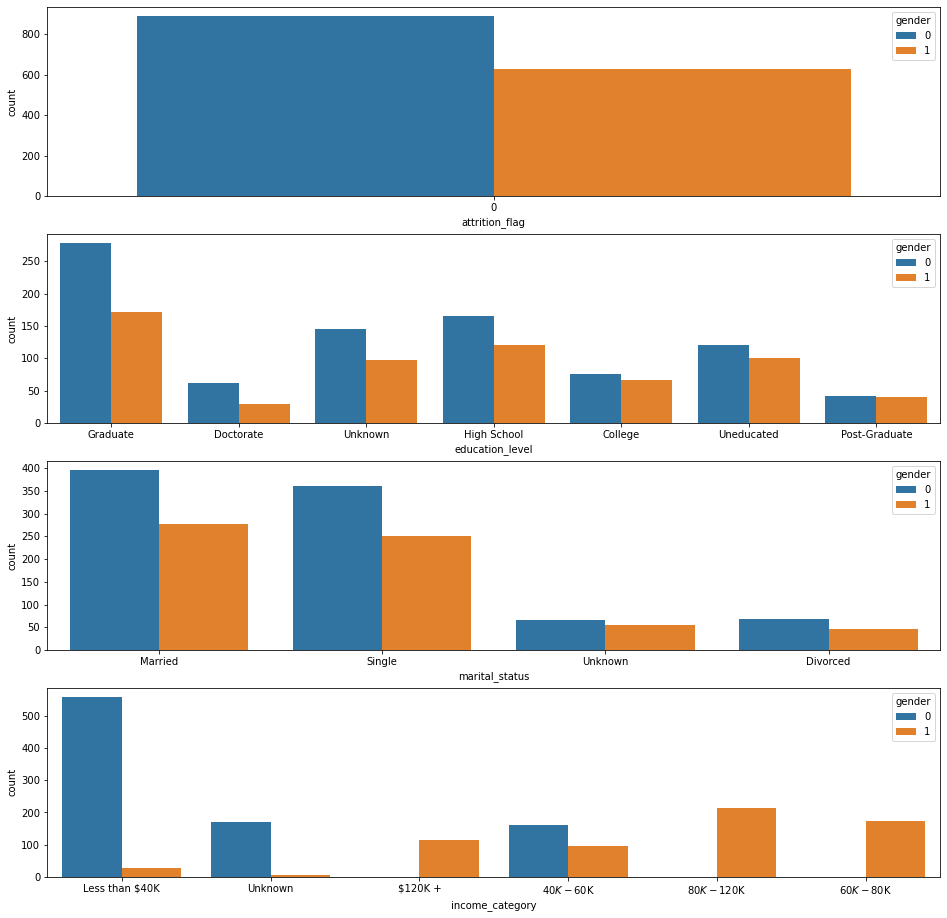

In [24]:
plt.figure(figsize = (16,16))

plt.subplot(4,1,1)
sns.countplot(cc.attrition_flag,hue=cc.gender)

plt.subplot(4,1,2)
sns.countplot(cc.education_level,hue=cc.gender)

plt.subplot(4,1,3)
sns.countplot(cc.marital_status,hue=cc.gender)

plt.subplot(4,1,4)
sns.countplot(cc.income_category,hue=cc.gender)

plt.show()

A proporção de mulher sendo o maior cancelador entre os azuis continua se mantendo, seja no número absoluto, separado por escolaridade ou por estado civil. Apenas o gráfico que relaciona o sexo com a faixa de salário anual mostra distribuições com homens cancelando mais cartões que mulheres, mas o que salta os olhos é poder ver que quase 600 pessoas que cancelaram o cartão Blue são mulheres que recebem menos de 40 mil dólares anuais.

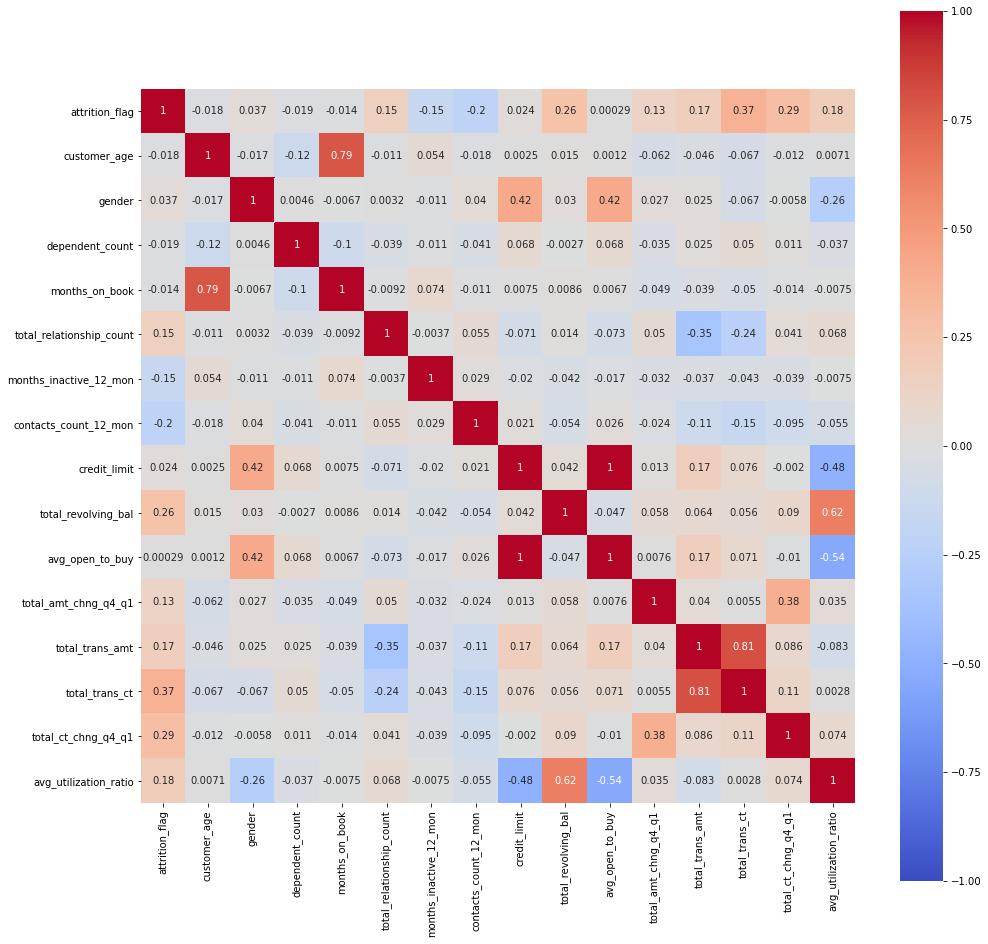

In [25]:
corr = df.corr()
fig = plt.figure(figsize = (16,16))
sns.heatmap(corr,vmax = 1,square = True,annot = True,cmap= 'coolwarm',vmin = -1)
plt.show()

Podemos ver que quantidade disponível para compra e limite de crédito tem correlação máxima entre eles.

Isto indica que o limite de crédito do cliente é totalmente relacionado com quanto ele ainda tem disponível para compras, o que é perfeitamente possível de se imaginar.

É também interessante perceber que existe uma grande correlação entre a quantidade de meses que o cliente possui o cartão com a sua idade, será que clientes mais velhos são mais propensos a ter uma maior fidelidade? ou os mais jovens procuram sempre opções que possam parecer mais vantajosas a eles?

Também há uma correlação grande entre a quantidade de vezes em que se usou o cartão nos últimos 12 meses com o total gasto no cartão nos últimos 12 meses.

Do lado das correlações menores, podemos ver que quanto menor a frequência de uso do cartão, menor é o seu limite e sua quantidade disponível para compra, o que reforça a primeira 
ideia dessa seção.

O attrition_flag tem correlação de -0,2 com o contacts_count_12_mon, isso nos indica que um grande número de contatos com o banco abaixa o valor da attrition_flag, que nesse caso é 0 ou 1, tendo então um impacto no cancelamento do cartão.

C:\Users\adm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adm\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\adm\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adm\anaconda3\lib\site-packages\seaborn\distributions

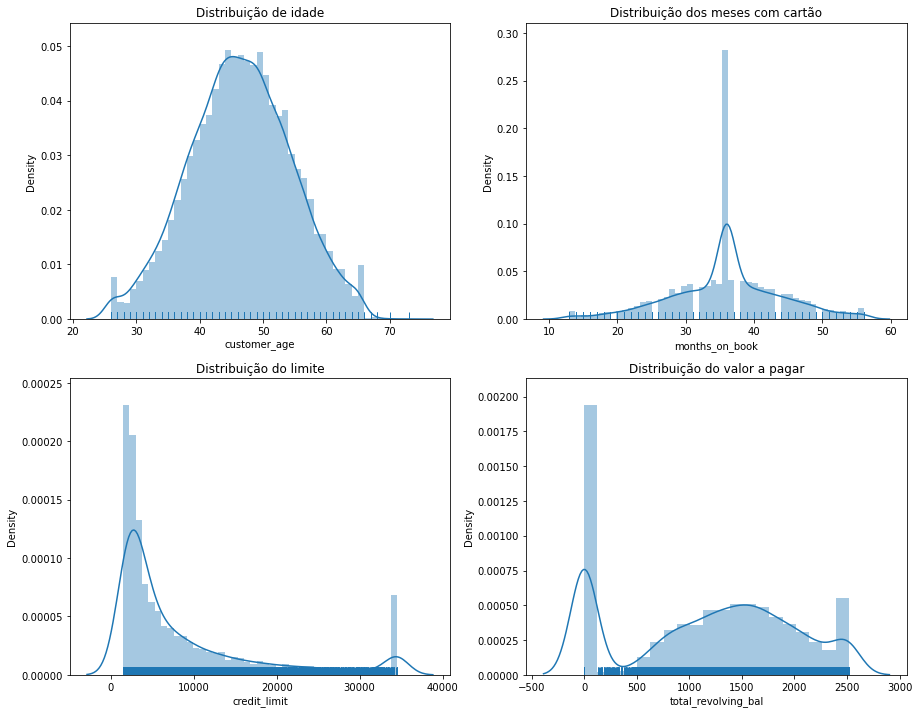

In [26]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.title('Distribuição de idade')
sns.distplot(df['customer_age'], rug = True)


plt.subplot(2,2,2)
plt.title('Distribuição dos meses com cartão')
sns.distplot(df['months_on_book'], rug = True)

plt.subplot(2,2,3)
plt.title('Distribuição do limite')
sns.distplot(df['credit_limit'], rug = True)

plt.subplot(2,2,4)
plt.title('Distribuição do valor a pagar')
sns.distplot(df['total_revolving_bal'], rug = True)
plt.ioff()
#plt.show()

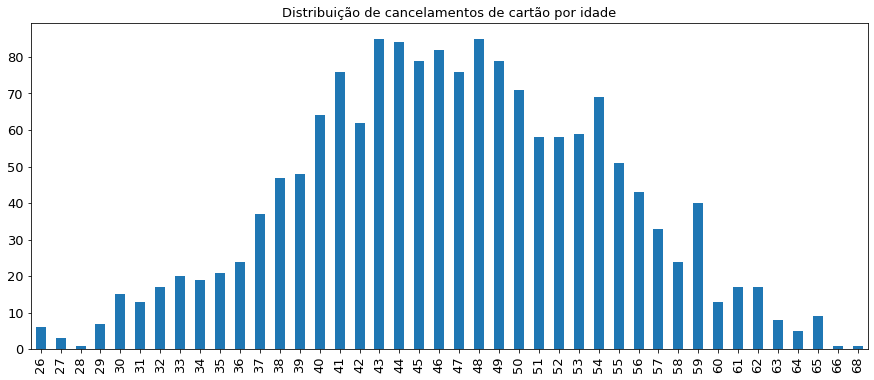

In [27]:
plot = df[df.attrition_flag == 0].customer_age.value_counts().sort_index().plot(kind = "bar", figsize=(15,6), fontsize = 13)
plot.set_title("Distribuição de cancelamentos de cartão por idade", fontsize = 13)
plt.ioff()

Vemos aqui que a maior taxa de cancelamento de cartões se dá entre os 40 e 50 anos de idade.


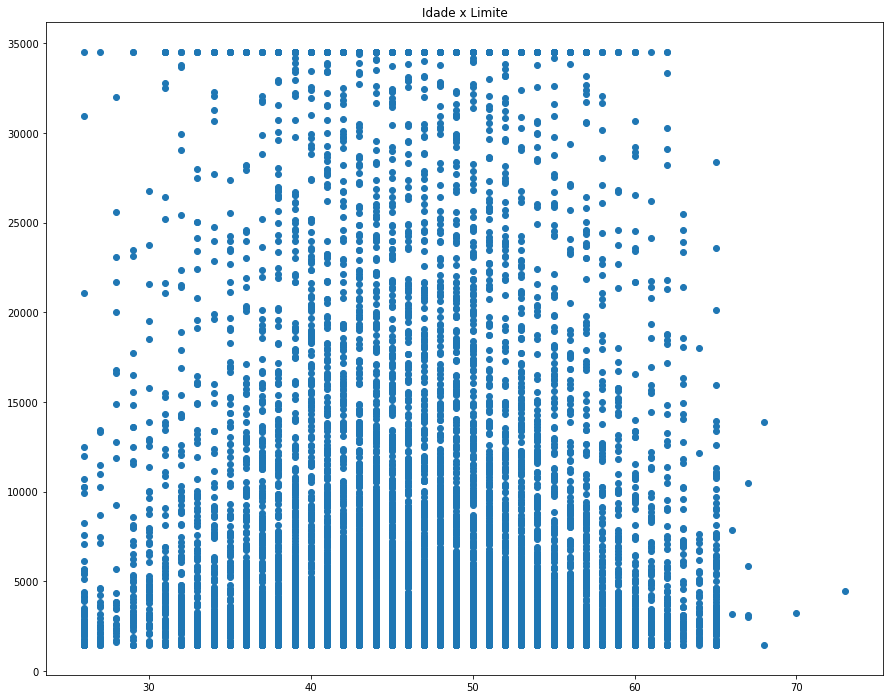

In [28]:
plt.figure(figsize=(15, 12))
plt.scatter(df.customer_age,df.credit_limit)
plt.title('Idade x Limite')
plt.ioff()

Este gráfico não mostra muita coisa além de que os maiores limites se acuulam entre 40 e 50 anos.

Conclusões

1- A extrema maioria de pessoas que cancelam o cartão usam o tipo Blue.

2- A distribuição entre sexo fica com aproximadamente 53% de mulheres e 47% homens. Essa distribuiçao se mantém razoavelmente parecida quando se analisa apenas as pessoas que cancelaram o cartão.

3- A distribuição fica maior para o lado masculino quando vamos aumentando a faixa de salário anual do cliente.

4- Clientes que tiveram mais contatos com o banco têm maior índice de cancelamento.

5- O maior número de contato com o banco tende a prever um cliente que tem maiores chances de cancelar o cartão.

6- Os cancelamentos costumam ser maiores com clientes que ficam na feixa etária de 40 a 50 anos.